In [ ]:
### IMPORTS

!pip install scikit_posthocs
!pip install ipython-autotime
!pip install seaborn==0.13.2

%load_ext autotime

import string
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import scipy.stats as ss
import scikit_posthocs as scihoc
import seaborn as sns

from matplotlib import patches
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from os import listdir
from re import search, escape, sub
from scipy import integrate

import gspread
from google.colab import auth, drive
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
drive.mount('/content/gdrive/', force_remount=True)

In [ ]:
### PATH

experiment_to_analyse = '' # INSERT HERE NAME OF EXPERIMENT
path = f"" # INSERT HERE PATH TO DATA

time: 712 µs (started: 2024-08-22 19:41:07 +00:00)


In [ ]:
### COLOR SCHEME

colordict = {'Brassica': '#8d8089',
             'Pelt': '#50414c',
             'Brinjal': '#5e3a42',
             'Middleton Pink': '#fde7e5',
             'Calluna': '#ccc8ce',
             'Sugaroom Red': '#d0bfcd',
             'Preference Red': '#6d4247',
             'Sulking Room Pink': "#a0837f",
             'Cinder Rose': "#c6a4a6",
             'Nancys Blushes': "#ecb7b8",
             'Rangwali': "#bf7a8f",
             'Lake Red': "#c8526a",
             'Rectory Red': "#a53c49",
             'Incarnadine': "#a04344",
             'Blazer': "#b64f48",
             'Harissa': "#ae5043",
             'Charlottes Locks': "#d65f3d",
             'Book Room': "#ab6758",
             'Red Earth': "#c57b67",
             'India Yellow': "#cb9e59",
             'Sudbury Yellow': "#dcb771",
             'Babouche': "#ecc363",
             'Yellowcake': "#ebe05e",
             'Yellow Ground': "#f2cf86",
             'Dayroom Yellow': "#f7e29d",
             'Dorset Cream': "#efd5a1",
             'Tallow': "#fdedd7",
             'Farrows Cream': "#efdbb3",
             'Hay': "#dec795",
             'Citrona': "#dbcc7c",
             'Churlish Green': "#c8bd83",
             'Yeabridge Green': "#909e6e",
             'Bancha': "#686a47",
             'Duck Green': "#465741",
             'Green Ground': "#dbdab6",
             'Cooking Apple Green': "#c4c6a5",
             'Lichen': "#a1a189",
             'Breakfast Room Green': "#94a68a",
             'Calke Green': "#758769",
             'Emerald Green': "#7bae72",
             'Verdigris': "#3e8b67",
             'Vardo': "#427e83",
             'Arsenic': "#84b59c",
             'Green Smoke': "#737c70",
             'Oval Room Blue': "#8b9d9b",
             'Green Blue': "#acbdb2",
             'Dix Blue': "#99b0ab",
             'Parma Gray': "#b1bfc5",
             'Blue Ground': "#a1c5c8",
             'Stone Blue': "#7997a1",
             'Inchyra Blue': "#586768",
             'Hague Blue': "#3d4e57",
             'Stiffkey Blue': "#4d5b6a",
             'St Giles Blue': "#599ec4",
             'Ultra Marine Blue': "#5d82a1",
             'Cooks Blue': "#6a90b4",
             'Lulworth Blue': "#a0b8c8",
             'Pitch Blue': "#636e8f",
             'Imperial Purple': "#55566b",
             'Scotch Blue': "#41404c",
             'Paean Black': "#494248",
             'Railings': "#45494b",
             'Off Black': "#444546",
             'Pitch Black': "#3b3938",
             'Pigeon': "#a0a093",
             'Old White': "#cec3ad",
             'Strong White': "#e5e0db",
             'Cabbage White': "#e8eeea"}

time: 15.9 ms (started: 2024-08-22 19:55:40 +00:00)


In [ ]:
### DICTIONARIES FOR NAMES

enzymes = {
    'set1': 'nnLuz_v4, nnH3H_v2, nnHispS, NpgA',
    'set2': 'nnH3H_v2, nnHispS, NpgA',
    'set3': 'nnHispS',
    'set4': 'NpgA',
    'set5': 'nnHispS, NpgA',
    'set6': 'nnLuz_v4, nnH3H_v2',
    'set7': 'nnLuz_v4',
    'set8': 'nnH3H_v2',
    'set9': 'constitutive expression',
    'set10': 'empty',
    'set11': 'empty',
    'set12': 'empty',
} # Example dict of labels

replace_dict = {
    'g_': '',
    'uM': ' \u03BCM',
    ',': '.',
    'c_': 'coronatine ',
    'MJ': 'methyl jasmonate',
    '_': ' ',
    'mM': ' mM'
} # Example dict for labels corrections

replace_pattern = '|'.join(sorted(escape(k) for k in replace_dict))

time: 1.44 ms (started: 2024-08-22 13:32:23 +00:00)


In [ ]:
### DATA PROCESSING

filename = '' # INSERT HERE FILENAME
file = pd.ExcelFile(f'{path}{filename}')
full_data = pd.DataFrame()
conditions = file.sheet_names

for sheet_num, sheet_name in enumerate(conditions):
  sheet = pd.read_excel(file, sheet_name = sheet_name, index_col = 'Unnamed: 0')
  sheet = sheet.transpose()
  sheet['Sum'] = sheet.sum(axis = 1)
  sheet['Substance'] = sub(replace_pattern, lambda m: replace_dict.get(m.group(0)), sheet_name)
  sheet['Label'] = sheet.apply(lambda row: enzymes[row.name.split('.')[0]].replace(' ', '\n').replace(', ', '\n'), axis = 1)
  full_data = pd.concat([full_data, sheet], axis = 0)
full_data.to_csv(f'{path}{experiment_to_analyse}_full_data.csv')
full_data

,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,...,30.5,30.75,31.0,31.25,31.5,31.75,32.0,Sum,Substance,Label
set1,98.919,93.838,94.243,74.135,82.243,56.865,84.405,88.811,63.378,78.838,...,68.000,54.378,68.541,77.811,80.649,51.405,86.027,9614.056,methyl jasmonate 20 μM,"nnLuz_v4,\nnnH3H_v2,\nnnHispS,\nNpgA"
set2,74.622,63.730,97.919,89.730,99.649,86.081,72.649,52.838,77.108,77.703,...,57.324,82.784,51.541,65.649,58.135,54.595,62.405,9142.600,methyl jasmonate 20 μM,"nnH3H_v2,\nnnHispS,\nNpgA"
set3,87.649,116.027,84.081,93.595,108.216,84.324,84.405,78.649,82.351,113.135,...,77.000,95.189,71.595,74.297,70.162,76.649,60.243,9405.325,methyl jasmonate 20 μM,nnHispS
set4,603.784,614.487,605.135,546.216,569.703,573.405,565.270,530.676,539.216,526.081,...,521.757,506.568,475.757,484.973,509.811,486.000,512.811,69573.891,methyl jasmonate 20 μM,NpgA
set5,138.432,115.811,90.351,84.459,102.784,104.676,100.189,66.054,80.865,86.108,...,61.162,60.081,64.108,58.649,90.054,64.865,70.108,10218.130,methyl jasmonate 20 μM,"nnHispS,\nNpgA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
set8.7,526.189,515.757,542.081,534.216,541.676,540.757,524.459,516.027,506.135,548.351,...,465.000,462.405,447.865,483.865,448.649,455.297,462.351,64781.595,coronatine 0.01 μM,nnH3H_v2
set9.7,595.946,637.973,602.324,577.649,569.757,578.811,536.243,529.351,542.054,542.973,...,413.676,430.649,416.108,435.757,442.838,391.405,409.378,62532.164,coronatine 0.01 μM,constitutive\nexpression
empty.21,40.324,37.000,49.324,39.595,44.649,39.405,40.000,40.811,41.595,40.486,...,64.351,39.703,48.838,37.649,47.838,52.568,47.189,6122.486,coronatine 0.01 μM,empty
empty.22,56.595,36.486,38.622,35.568,38.135,42.243,52.676,30.405,37.757,52.973,...,30.865,57.595,63.432,66.730,70.000,60.108,66.081,6538.381,coronatine 0.01 μM,empty


time: 4.12 s (started: 2024-07-26 17:12:27 +00:00)


In [ ]:
### DATA PROCESSING WITH BACKGROUNG SUBTRACTION

filename = '' # INSERT HERE FILENAME
file = pd.ExcelFile(f'{path}{filename}')
full_data = pd.DataFrame()
raw_data = pd.DataFrame()
conditions = file.sheet_names

for sheet_num, sheet_name in enumerate(conditions):
  sheet = pd.read_excel(file, sheet_name = sheet_name, index_col = 'Unnamed: 0')
  sheet = sheet.transpose()
  sheet['Substance'] = sub(replace_pattern, lambda m: replace_dict.get(m.group(0)), sheet_name)
  sheet['Label'] = sheet.apply(lambda row: enzymes[row.name.split('.')[0]].replace(' ', '\n').replace(', ', '\n'), axis = 1)
  raw_data = pd.concat([raw_data, sheet], axis = 0)

time = raw_data.columns[:-2]
raw_data_without_bg = raw_data[raw_data['Label'] != 'bg']
bg = raw_data[raw_data['Label'] == 'bg']
bg_mean = bg[time].mean(numeric_only=True, axis = 0)
bg_std = bg[time].std(numeric_only=True, axis = 0)
bg = bg_mean - 3*bg_std

full_data = pd.DataFrame()
for row_index, row in raw_data_without_bg.iterrows():
  modified_row = np.subtract(row[:-2].values.tolist(), bg)
  modified_row = pd.DataFrame(pd.concat([modified_row, row[-2:]])).transpose()
  full_data = pd.concat([full_data, modified_row], axis = 0)
full_data['Sum'] = full_data.apply(lambda row: row[:-2].sum(), axis = 1)
full_data.to_csv(f'{path}{experiment_to_analyse}_full_data_bg_sub2.csv')
full_data

                0.0    0.25     0.5    0.75     1.0    1.25     1.5    1.75  \
background1  49.838  56.486  45.865  46.000  46.838  23.973  25.703  24.649   
background2  55.135  63.865  35.405  85.216  57.189  56.730  38.730  59.054   
background3  35.827  60.212  55.135  57.673  61.577  43.654  66.577  64.000   

                2.0    2.25  ...   30.25    30.5   30.75    31.0   31.25  \
background1  30.973  35.676  ...  33.216  45.243  36.351  55.757  47.243   
background2  56.378  54.459  ...  49.973  51.514  57.541  52.973  38.108   
background3  53.346  54.423  ...  59.404  69.981  59.808  60.154  61.231   

               31.5   31.75    32.0   Substance  Label  
background1  61.216  53.649  38.730  background     bg  
background2  42.568  91.676  51.189  background     bg  
background3  51.885  65.731  62.462  background     bg  

[3 rows x 131 columns]
0.00     17.004287
0.25     49.118986
0.50     15.855395
0.75      2.554758
1.00     32.497726
           ...    
31.00    45.

,0.0,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,...,30.5,30.75,31.0,31.25,31.5,31.75,32.0,Substance,Label,Sum
0,81.914713,44.719014,78.387605,71.580242,49.745274,64.879998,103.374947,103.88065,58.105161,63.153978,...,51.001572,41.959346,23.108034,63.888539,56.731336,39.343271,70.846148,methyl jasmonate 20 μM,"nnLuz_v4,\nnnH3H_v2,\nnnHispS,\nNpgA",7440.545736
0,57.617713,14.611014,82.063605,87.175242,67.151274,94.095998,91.618947,67.90765,71.835161,62.018978,...,40.325572,70.365346,6.108034,51.726539,34.217336,42.533271,47.224148,methyl jasmonate 20 μM,"nnH3H_v2,\nnnHispS,\nNpgA",6969.089736
0,70.644713,66.908014,68.225605,91.040242,75.718274,92.338998,103.374947,93.71865,77.078161,97.450978,...,60.001572,82.770346,26.162034,60.374539,46.244336,64.587271,45.062148,methyl jasmonate 20 μM,nnHispS,7231.814736
0,586.779713,565.368014,589.279605,543.661242,537.205274,581.419998,584.239947,545.74565,533.943161,510.396978,...,504.758572,494.149346,430.324034,471.050539,485.893336,473.938271,497.630148,methyl jasmonate 20 μM,NpgA,67400.380736
0,121.427713,66.692014,74.495605,81.904242,70.286274,112.690998,119.158947,81.12365,75.592161,70.423978,...,44.163572,47.662346,18.675034,44.726539,66.136336,52.803271,54.927148,methyl jasmonate 20 μM,"nnHispS,\nNpgA",8044.619736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,509.184713,466.638014,526.225605,531.661242,509.178274,548.771998,543.428947,531.09665,500.862161,532.666978,...,448.001572,449.986346,402.432034,469.942539,424.731336,443.235271,447.170148,coronatine 0.01 μM,nnH3H_v2,62608.084736
0,578.941713,588.854014,586.468605,575.094242,537.259274,586.825998,555.212947,544.42065,536.781161,527.288978,...,396.677572,418.230346,370.675034,421.834539,418.920336,379.343271,394.197148,coronatine 0.01 μM,constitutive\nexpression,60358.653736
0,23.319713,-12.118986,33.468605,37.040242,12.151274,47.419998,58.969947,55.88065,36.322161,24.801978,...,47.352572,27.284346,3.405034,23.726539,23.920336,40.506271,32.008148,coronatine 0.01 μM,empty,3948.975736
0,39.590713,-12.632986,22.766605,33.013242,5.637274,50.257998,71.645947,45.47465,32.484161,37.288978,...,13.866572,45.176346,17.999034,52.807539,46.082336,48.046271,50.900148,coronatine 0.01 μM,empty,4364.870736


time: 6.75 s (started: 2024-08-02 11:26:47 +00:00)


<ipython-input-35-3f7714be9f8f>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_plot['comb_label'] = data_to_plot.apply(lambda row: f"{row['Label']}-{row['Substance']}", axis = 1)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  bar_func = ax.bar
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  bar_func = ax.bar
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the siz

empty
nnLuz_v4,
nnH3H_v2,
nnHispS,
NpgA
nnHispS,
NpgA
nnH3H_v2,
nnHispS,
NpgA
nnHispS
nnLuz_v4
nnLuz_v4,
nnH3H_v2
NpgA
nnH3H_v2
constitutive
expression


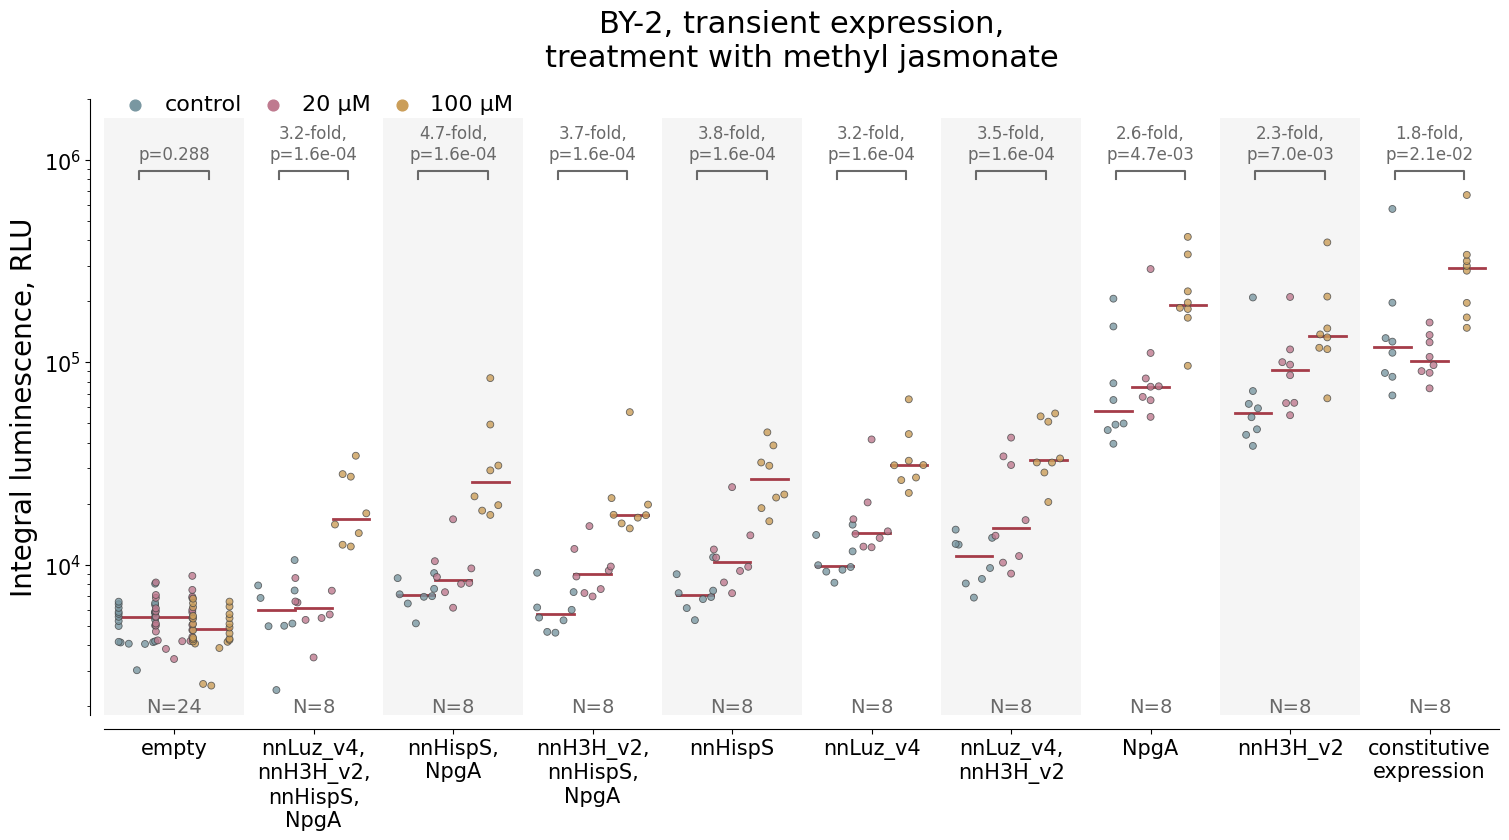

time: 13 s (started: 2024-08-02 11:35:45 +00:00)


In [ ]:
### PLOTTING

medianprops = {'color': colordict['Rectory Red'],
               'linewidth': 2}
capprops = {
            'color': 'white',
            'linewidth': 0
            }
whiskerprops = {
            'color': 'white',
            'linewidth': 0
            }
boxprops = {
    'edgecolor': 'white',
            'linewidth': 0}


xlabel_size = 20
ylabel_size = 20
yticklabel_size = 15
xticklabel_size = 15
title_size = 22
suptitle_size = 20
legend_size = 20
signplot_size = 12


data = pd.read_csv(f'{path}{experiment_to_analyse}_full_data_bg_sub2.csv', index_col = 'Unnamed: 0')
sorting_order = data[data.Substance == 'methyl jasmonate 20 μM'].groupby('Label').median(numeric_only = True).sort_values('Sum', ascending = True).index.values.tolist()
conditions = data.Substance.unique()
selected = [x for x in conditions if 'coronatine' not in x]
hue_order = ['control', 'methyl jasmonate 20 μM', 'methyl jasmonate 100 μM']
data_to_plot = data[data.Substance.isin(selected)]
data_to_plot['comb_label'] = data_to_plot.apply(lambda row: f"{row['Label']}-{row['Substance']}", axis = 1)
mann_whitney_test = scihoc.posthoc_mannwhitney(data_to_plot, val_col = 'Sum', group_col = 'comb_label')

palette_swarm = {'methyl jasmonate 20 μM' : colordict['Rangwali'],
                 'methyl jasmonate 100 μM' : colordict['India Yellow'],
                 'methyl jasmonate 500 μM' : colordict['Rectory Red'],
                 'methyl jasmonate 2.5 mM' : colordict['Charlottes Locks'],
                 'methyl jasmonate 12.5 mM' : colordict['India Yellow'],
                 'control': colordict['Stone Blue'],} # Example dict for color scheme
fig, ax = plt.subplots(1, figsize = (18, 8))
ax1 = ax


sns.boxplot(data=data_to_plot,
            x='Label',
            y='Sum',
            hue = 'Substance',
            palette = ['white' for x in range(len(sorting_order))],
            medianprops = medianprops,
            capprops = capprops,
            whiskerprops = whiskerprops,
            boxprops = boxprops,
            order = sorting_order,
            hue_order = hue_order,
            showfliers = False,
            dodge = True,
            ax = ax1)

sns.swarmplot(data=data_to_plot,
              x='Label',
              y='Sum',
              hue = 'Substance',
              order = sorting_order,
              hue_order = hue_order,
              palette = palette_swarm,
              ax = ax1,
              alpha = 0.8,
              dodge = True,
              edgecolor=colordict['Off Black'],
              linewidth=0.6,
              )

cols = len(hue_order)
h, l = ax.get_legend_handles_labels()
ax.legend(handles=[item for item in h[cols:]],
          labels= [item.replace('methyl jasmonate ', '') for item in l[cols:]],
          loc = (0, 0.96),
          frameon = False,
          fontsize = legend_size-4,
          ncol = cols,
          columnspacing=0.4,
          labelspacing = 0.3,
          handletextpad = 0.3
          )


ax1.set_yscale('log')
sns.despine(offset=10, trim=False, ax = ax1)

values_range = np.divide(data_to_plot['Sum'].max(), data_to_plot['Sum'].min())
if values_range < 100:
    x_max = pow(10, (math.ceil(math.log10(data_to_plot['Sum'].max()))))
    if data_to_plot['Sum'].min() > 0:
        x_min = pow(10, (math.floor(math.log10(data_to_plot['Sum'].min()))))
        ax1.set_ylim(x_min, x_max)
    else:
        ax1.set_ylim(ymax=x_max)


ax1.set_xlabel(None, fontsize = xlabel_size)
ax1.set_ylabel('Integral luminescence, RLU', fontsize = ylabel_size)
ax1.set_title(f'BY-2, transient expression,\ntreatment with methyl jasmonate', fontsize = title_size, y = 1.04)
ax1.tick_params(axis = 'both', labelsize = xticklabel_size)
ylim_high = 2000000
ax1.set_ylim(ymax = ylim_high)
xTickPos,_ = plt.xticks()
xTickPos = xTickPos[:]
ax.bar(xTickPos, ylim_high * 0.8, width=(xTickPos[1]-xTickPos[0]), color=['whitesmoke','w'])

pairs = [[(lab, 'control'), (lab, 'methyl jasmonate 100 μM')] for lab in sorting_order]
val_col = 'Sum'
means = data_to_plot.groupby('comb_label').mean()
pvalues = [mann_whitney_test.loc['-'.join(pairs[x][0]), '-'.join(pairs[x][1])] for x in range(len(pairs))]
fold_changes = [round(np.divide(means.loc['-'.join(x[1]), val_col], means.loc['-'.join(x[0]), val_col]), 1) for x in pairs]
formatted_pvalues = []
for p, f in zip(pvalues, fold_changes):
  if p >= 0.05:
    formatted_pvalues.append(f"p={round(p, 3)}")
  elif p < 0.05 and f >= 1:
    formatted_pvalues.append(f"{f}-fold,\np={p:.1e}")
  elif p < 0.05 and f < 1:
    formatted_pvalues.append(f"{round(1/f, 1)}-fold,\np={p:.1e}")

offset = 0.25

for pair_index, pair in enumerate(sorting_order):
  print(pair)
  x1, x2 = pair_index - offset, pair_index + offset
  y = 800000
  h = y/10
  col = 'dimgrey'
  ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
  p_value = formatted_pvalues[pair_index]
  ax.text((x1+x2)*.5, y+2*h, p_value, ha='center', va='bottom', fontsize = signplot_size, color = 'dimgrey')


ns = data_to_plot.groupby('Label').size() / len(selected)
offset_ = 0
for label_pos, label in enumerate(sorting_order):
  full_label = f"{label}"
  ax1.text(label_pos + offset_,
          ax1.get_ylim()[0]*1.1,
          f'N={int(ns[full_label])}',
          fontsize=xticklabel_size-1,
          ha='center',
          va='center',
          color = 'dimgrey'
          )
ver = 'ver3.0'
plot_name = '' # INSERT HERE NAME FOR PLOT
plt.savefig(f'{path}{experiment_to_analyse}_{plot_name}_{ver}.png',
            dpi = 400,
            bbox_inches='tight',
            transparent=False,
            facecolor='white')